# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Myntra is a leading Indian fashion e-commerce company, widely known for its diverse collection of clothing, accessories, and lifestyle products. While Myntra primarily operates in the fashion industry, this dataset focuses on its UK-based division, Myntra Gifts Ltd., which specializes in unique giftware for various occasions.

This dataset captures detailed online retail transactions made through Myntra Gifts Ltd.’s non-store e-commerce platform. It spans a period from December 1, 2009, to December 9, 2011, covering over two years of sales data.

The dataset provides a comprehensive snapshot of Myntra Gifts Ltd.’s international online retail activities, including:

1. Transaction details (Invoice numbers, dates, and customer information)

2. Product information (Stock codes, descriptions, and pricing)

3.  Purchase behavior (Quantities purchased per transaction)

4.  Geographic reach (Countries where orders were placed)

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Myntra Gifts Ltd. wants to understand customer purchasing behavior to improve marketing and sales strategies.Proper customer segmentation can help optimize marketing efforts, increase customer retention, and improve inventory management.Use unsupervised machine learning (e.g., clustering techniques like K-Means) and RFM analysis to segment customers based on their purchase history.
1. Identify Key Customer Segments – Understand different types of customers based on purchase frequency, monetary value, and product preferences.
2. Enhance Marketing Strategies – Design targeted marketing campaigns and personalized offers for different customer groups.
3. Improve Customer Retention – Identify high-value customers and develop strategies to enhance their engagement and satisfaction.
4. Optimize Inventory Management – Understand product demand trends across customer segments to ensure better stock planning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [70]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
import ast
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [18,7]
sns.set_style("darkgrid")
sns.set_palette("viridis")
# Display utilities for Markdown in Jupyter/Colab
from IPython.display import display, Markdown
#libraries for model evalution
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples

### Dataset Loading

In [71]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
path='/content/drive/MyDrive/Projectmodule6/onlineRetail.csv'

In [73]:
# Used to display all hidden columns
pd.set_option('display.max_columns',None)

### Dataset First View

In [74]:
# Dataset First Look
online_Retail=pd.read_csv(path)
online_Retail


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [75]:
# Creating a duplicate copy of original dataset before making any changes
Myntra_online_Retail=online_Retail.copy()

### Dataset Rows & Columns count

In [76]:
# Dataset Rows & Columns count
Myntra_online_Retail.shape

(541909, 8)

### Dataset Information

In [77]:
# Dataset Info
Myntra_online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [78]:
# Dataset Duplicate Value Count
Myntra_online_Retail.duplicated().sum()

5268

#### Missing Values/Null Values

In [79]:
# Missing Values/Null Values Count
Myntra_online_Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


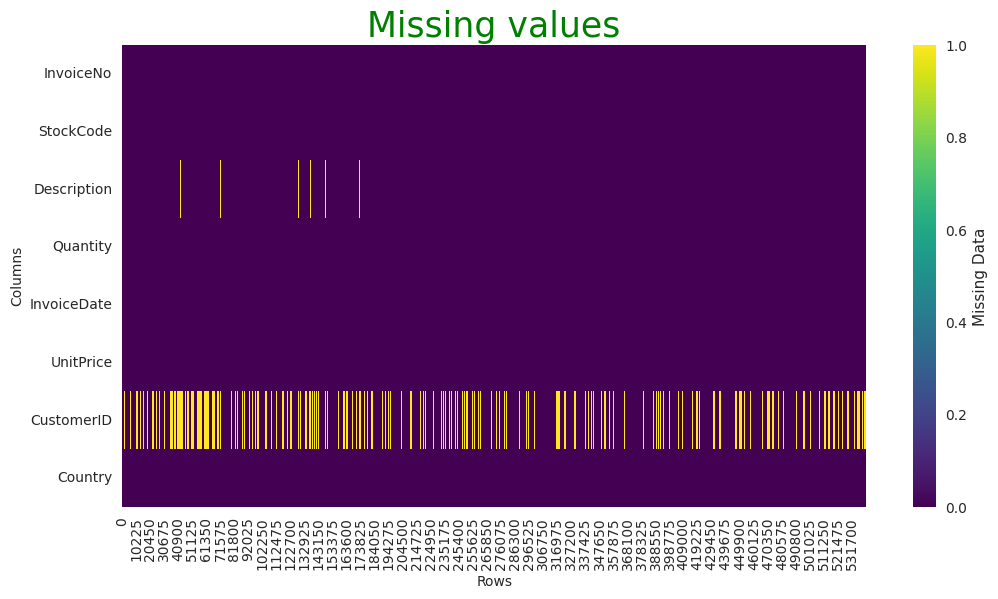

In [80]:
# Visualizing the missing values
# Plotting the heatmap
plt.figure(figsize=(12,6))
bar_plot=sns.heatmap(Myntra_online_Retail.isna().transpose(),cmap='viridis',cbar_kws={'label':'Missing Data'})
bar_plot.set_xlabel('Rows',fontsize=10)
bar_plot.set_ylabel('Columns',fontsize=10)
plt.title('Missing values',color='green',fontsize=25)
plt.show()

### What did you know about your dataset?

There are 541909 rows and 8 columns in the dataset.There are 5268 duplicated records present in the data and missing values present in Description and CustomerID columns.

## ***2. Understanding Your Variables***

## **Categorical Variables:**
1. InvoiceNo: A 6-digit unique identifier assigned to each transaction. If this code starts with the letter 'C', it indicates a cancelled transaction.
2. StockCode: A 5-digit unique product code assigned to each item in the inventory. This helps in tracking and categorizing products efficiently.
3. Description: The name of the product, providing a textual representation of the item being purchased.
4. CustomerID: A 5-digit unique identifier assigned to each customer. This helps in analyzing customer behavior and purchase patterns.
5. Country: The name of the country where the transaction took place, representing the geographical location of the customer.

## **Numerical Variables:**

1. Quantity: The number of units of a particular product purchased in a single transaction. This can include positive values for purchases and negative values for returns.
2. UnitPrice: The cost per unit of a product in British Pounds (£) (Sterling). It represents the selling price of an individual product.

## **Datetime Object:**

1. InvoiceDate: The exact timestamp of the transaction, including both the date and time. This allows for time-based analysis such as identifying peak purchase hours, trends over different periods, and seasonal buying patterns.

Here actually invoice date is in object dtype and have to convert into datetime.

In [81]:
# Dataset Columns
Myntra_online_Retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [82]:

# Dataset Describe
Myntra_online_Retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The Quantity and UnitPrice column shows the minimum values as negative and  these values might be due to the cancelled orders and refund.

The distribution of Quantity and UnitPrice looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.

### Check Unique Values for each variable.

In [83]:
# Check Unique Values for each variable.
unique_counts = Myntra_online_Retail.nunique()
unique_counts

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Feature Engineering & Data Pre-processing***

### Data Wrangling Code

##Handling duplicates and missing values in the dataset:

In [ ]:
# Write your code to make your dataset analysis ready.

In [84]:

#count percentage wise missing values
def missing_value_percentage(df):
  per_miss_values=Myntra_online_Retail.isnull().sum()*100/len(Myntra_online_Retail)
  miss_values_df=pd.DataFrame({'Feature_name':Myntra_online_Retail.columns,
                               'percentage':per_miss_values})
  return miss_values_df.sort_values('percentage',ascending=False)

In [85]:
#checking percentage wise missing values
missing_value_percentage(Myntra_online_Retail)

,Feature_name,percentage
CustomerID,CustomerID,24.926694
Description,Description,0.268311
InvoiceNo,InvoiceNo,0.000000
StockCode,StockCode,0.000000
Quantity,Quantity,0.000000
InvoiceDate,InvoiceDate,0.000000
UnitPrice,UnitPrice,0.000000
Country,Country,0.000000


In [86]:
# Write your code to make your dataset analysis ready.
Myntra_online_Retail.drop_duplicates(inplace=True)
Myntra_online_Retail.dropna(inplace=True)


Since 24.93% of purchased items are not assigned to any customer, these entries hold no analytical value for customer-based segmentation. As clustering requires a CustomerID, we will remove these records from the dataset.Duplicate entries can skew analysis and lead to misleading insights.Missing values in critical columns (like CustomerID) can impact clustering, aggregation, and overall data quality.

In [87]:

# Again check missing values
Myntra_online_Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [88]:
# check the shape of the dataset
Myntra_online_Retail.shape

(401604, 8)

After handling missing values and removing duplicate records, our dataset now contains 401,604 rows and 8 columns. Next, we will identify and analyze the cancelled orders.

In [89]:
#check for order cancellations data
Myntra_online_Retail['InvoiceNo'] = Myntra_online_Retail['InvoiceNo'].astype('str')
Myntra_online_Retail[Myntra_online_Retail['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


We identified 8,872 records where orders were canceled, indicated by negative quantity values. These canceled orders will be removed from our analysis to ensure data accuracy.

In [90]:
# Dropping cancellations from the main dataframe
# consider only the non cancelled orders
Myntra_online_Retail = Myntra_online_Retail[~Myntra_online_Retail['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
Myntra_online_Retail.shape

(392732, 8)

In [91]:

# Final description of the dataset
Myntra_online_Retail.describe()


,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


The Quantity and UnitPrice columns no longer contain negative values.

However, the minimum UnitPrice is 0, which is unrealistic since a store cannot sell items for free.

To ensure data accuracy, we will analyze this column further and remove such records.









In [92]:

# check the columns having zero unit price
Myntra_online_Retail[Myntra_online_Retail['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom



There are few records with zero values in UnitPrice which cannot be true so we will drop these records.

In [93]:
# only consider UnitPrice greater than zero
Myntra_online_Retail=Myntra_online_Retail[Myntra_online_Retail['UnitPrice']>0]

In [94]:
# check description of UnitPrice after dropping
Myntra_online_Retail['UnitPrice'].describe()

,UnitPrice
count,392692.000000
mean,3.125914
std,22.241836
min,0.001000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


In [95]:

# first 5 rows of the data
Myntra_online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [96]:

# shape of the dataset
Myntra_online_Retail.shape

(392692, 8)

Our dataset is now nearly cleaned, and we can proceed with EDA; however, before that, we can derive some additional features to enhance our analysis.


# **Feature Engineering & Data Pre-processing**

Feature engineering is a crucial step in machine learning that involves creating new features(variables) from existing data to improve model performance. It helps extract meaningful patterns and transform raw data into a more informative format for both supervised and unsupervised learning.
1. Improves Model Accuracy – Helps algorithms identify better patterns in data.
2.  Enhances Predictive Power – Creates more relevant features that improve decision-making.
3. Speeds Up Learning – Reduces noise and redundancy, making data processing more efficient.
4. Simplifies Data Transformation – Converts raw data into a structured format suitable for machine learning models.

In [97]:
# convert invoicedate column into datetime format
Myntra_online_Retail['InvoiceDate']=pd.to_datetime(Myntra_online_Retail['InvoiceDate'])

In [98]:
# create some new features from invoice date
Myntra_online_Retail['Day']=Myntra_online_Retail['InvoiceDate'].dt.day_name()
Myntra_online_Retail['Year']=Myntra_online_Retail['InvoiceDate'].apply(lambda x:x.year)
Myntra_online_Retail['MonthNum']=Myntra_online_Retail['InvoiceDate'].apply(lambda x:x.month)
Myntra_online_Retail['DayNum']=Myntra_online_Retail['InvoiceDate'].apply(lambda x:x.day)
Myntra_online_Retail['Hour']=Myntra_online_Retail['InvoiceDate'].apply(lambda x:x.hour)
Myntra_online_Retail['Minute']=Myntra_online_Retail['InvoiceDate'].apply(lambda x:x.minute)
Myntra_online_Retail['Month']=Myntra_online_Retail['InvoiceDate'].dt.month_name()


In [99]:
Myntra_online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,MonthNum,DayNum,Hour,Minute,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December


In [100]:
#Added column TotalAmount
# create TotalAmount from Quantity and UnitPrice
Myntra_online_Retail['TotalAmount']=Myntra_online_Retail['Quantity']*Myntra_online_Retail['UnitPrice']


In [101]:
# Top 5 rows of the data
Myntra_online_Retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,MonthNum,DayNum,Hour,Minute,Month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 top 5 most sold products

In [102]:
#count of each product description
desc_df=Myntra_online_Retail['Description'].value_counts().reset_index()
desc_df.rename(columns={'Description':'Description Name','count':'Count'},inplace=True)
desc_df[:5]

,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


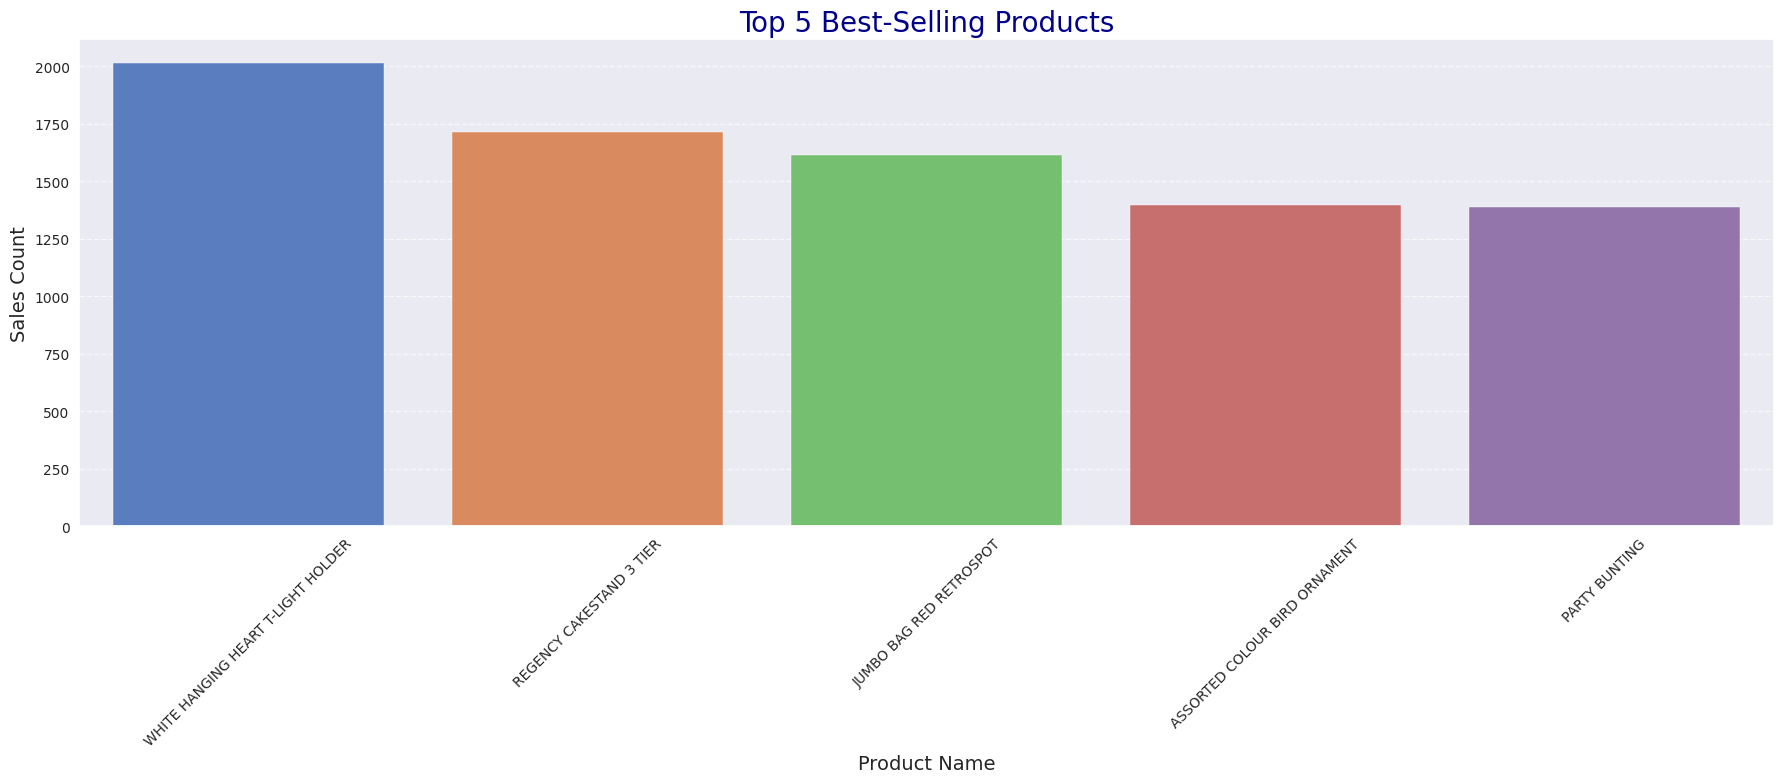

In [103]:
# Plot the top 5 most sold products
plt.figure(figsize=(18, 8))
sns.barplot(x='Description Name', y='Count', data=desc_df.head(5), palette='muted')

# Add title and customize appearance
plt.title('Top 5 Best-Selling Products', color='darkblue', fontsize=20)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)

# Enhance readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot allows us to compare the sales count of different products at a glance.Since Description Name (Product Name) is a categorical variable, a bar plot effectively displays its frequency distribution.

##### 2. What is/are the insight(s) found from the chart?

The top 5 most sold products are:

1. White Hanging Heart T-Light Holder

2. Regency Cakestand 3 Tier

3. Jumbo Bag Red Retrospot

4. Assorted Colour Bird Ornament

5. Party Bunting

#### Chart - 2 top 5 least sold products

In [104]:
# bottom 5 products
desc_df.tail()

,Description Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


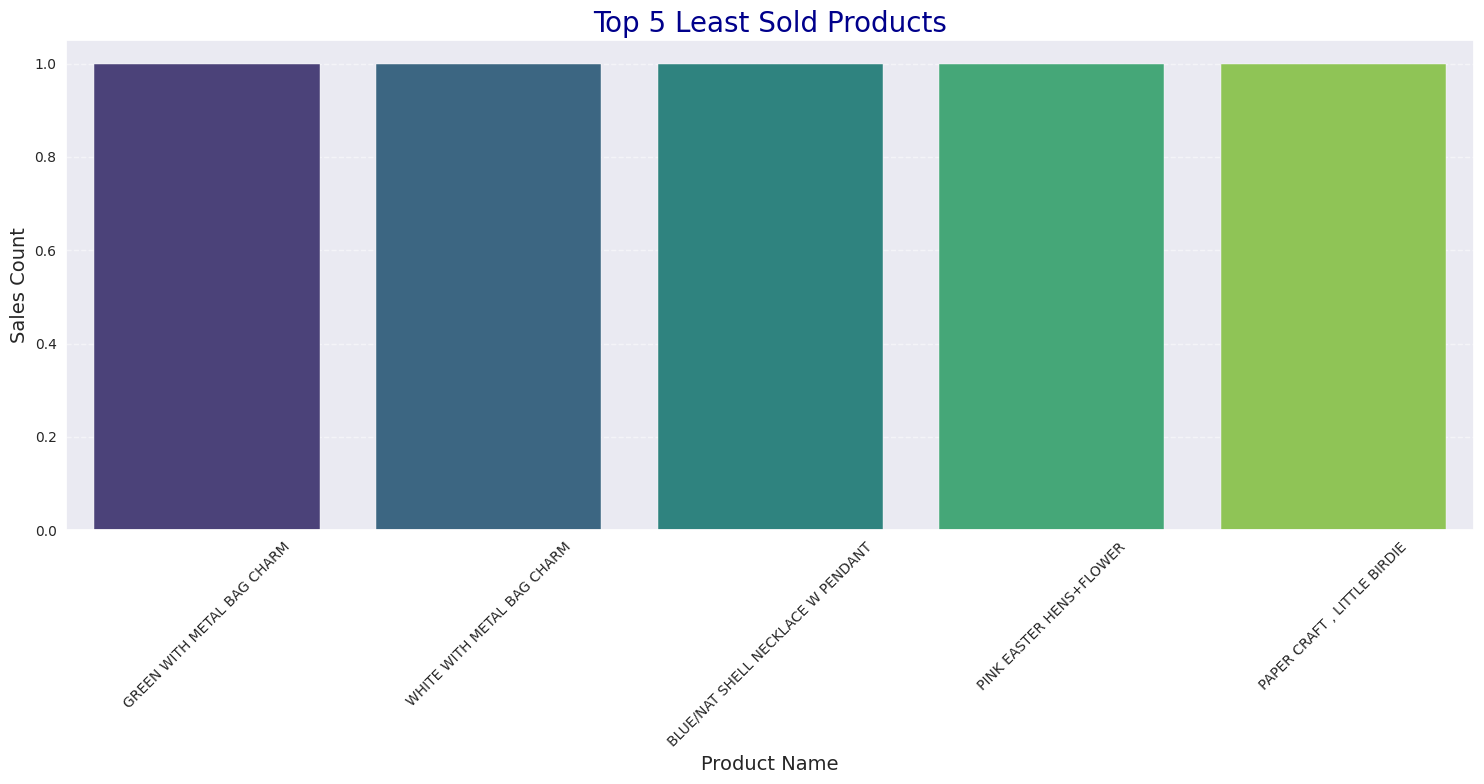

In [105]:
# Plot the top 5 least sold products
plt.figure(figsize=(15, 8))
sns.barplot(x='Description Name', y='Count', data=desc_df[-5:], palette='viridis')

# Add title and customize appearance
plt.title('Top 5 Least Sold Products', color='darkblue', fontsize=20)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#####  What is/are the insight(s) found from the chart?

The top 5 least sold products are:

Green with Metal Bag Charm

White with Metal Bag Charm

Blue/Nat Shell Necklace W Pendant

Pink Easter Hens + Flower

Paper Craft, Little Birdie

#### Chart - 3  top 5 countries with most number of customers

In [106]:
# count of customers for each country
# Generate the country counts DataFrame and reset the index
country_df = Myntra_online_Retail['Country'].value_counts().reset_index()

# Rename both columns in a single rename call to avoid confusion
country_df.rename(columns={'Country': 'Country Name','count':'Count'}, inplace=True)

# View the DataFrame to check the result
country_df[:5]


,Country Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


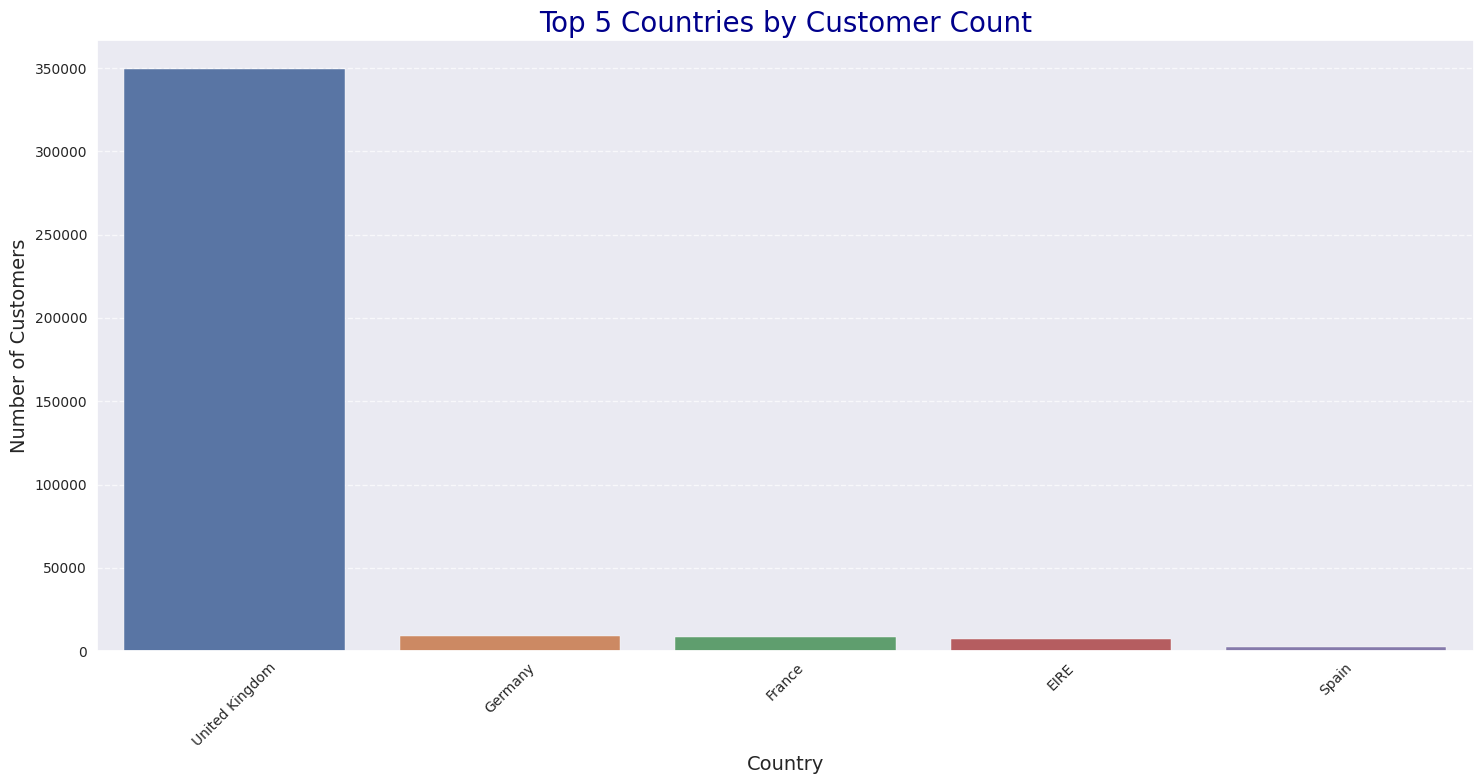

In [107]:
# Plot the top 5 countries by customer count
plt.figure(figsize=(15, 8))
sns.barplot(x='Country Name', y='Count', data=country_df.head(5), palette='deep')

# Add title and customize appearance
plt.title('Top 5 Countries by Customer Count', color='darkblue', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#####  What is/are the insight(s) found from the chart?

Since this is a UK-based company, the majority of customers are from the United Kingdom, with significantly fewer customers from other countries.

#### Chart - 4  bottom 5 countries with least number of customers

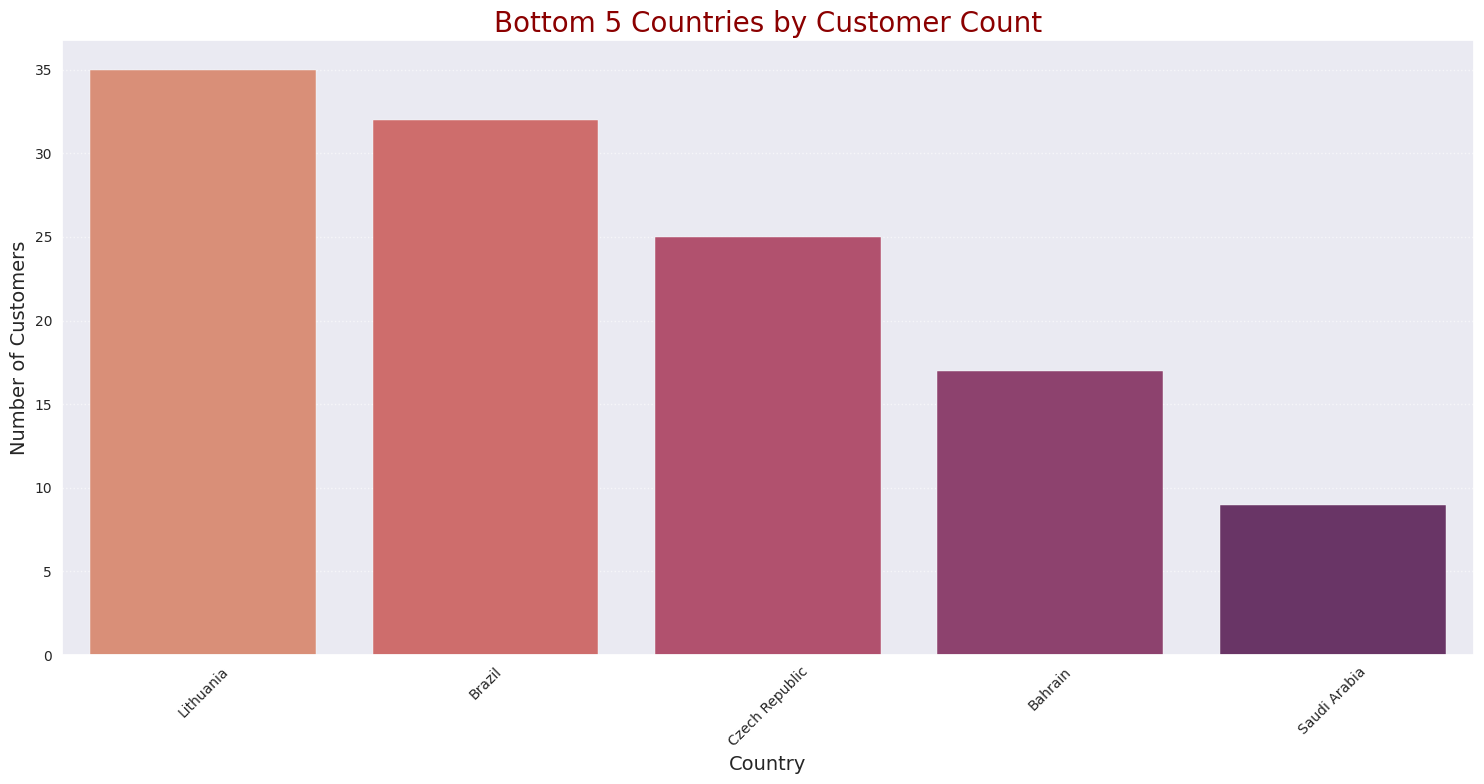

In [108]:
# Plot the bottom 5 countries by customer count
plt.figure(figsize=(15, 8))
sns.barplot(x='Country Name', y='Count',  data=country_df.tail(5), palette='flare')

# Add title and customize appearance
plt.title('Bottom 5 Countries by Customer Count', color='darkred', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


#####  What is/are the insight(s) found from the chart?

Saudi Arabia has the least number of customers followed by Bahrain.

#### Chart - 5  order share of top 10 customers

In [109]:
# order share of top 10 customers
order_share_df=(Myntra_online_Retail['CustomerID'].value_counts()/sum(Myntra_online_Retail['CustomerID'].value_counts())*100).reset_index()
order_share_df.columns=['CustomerID','Order share']
order_share_df.head(10).cumsum()

,CustomerID,Order share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


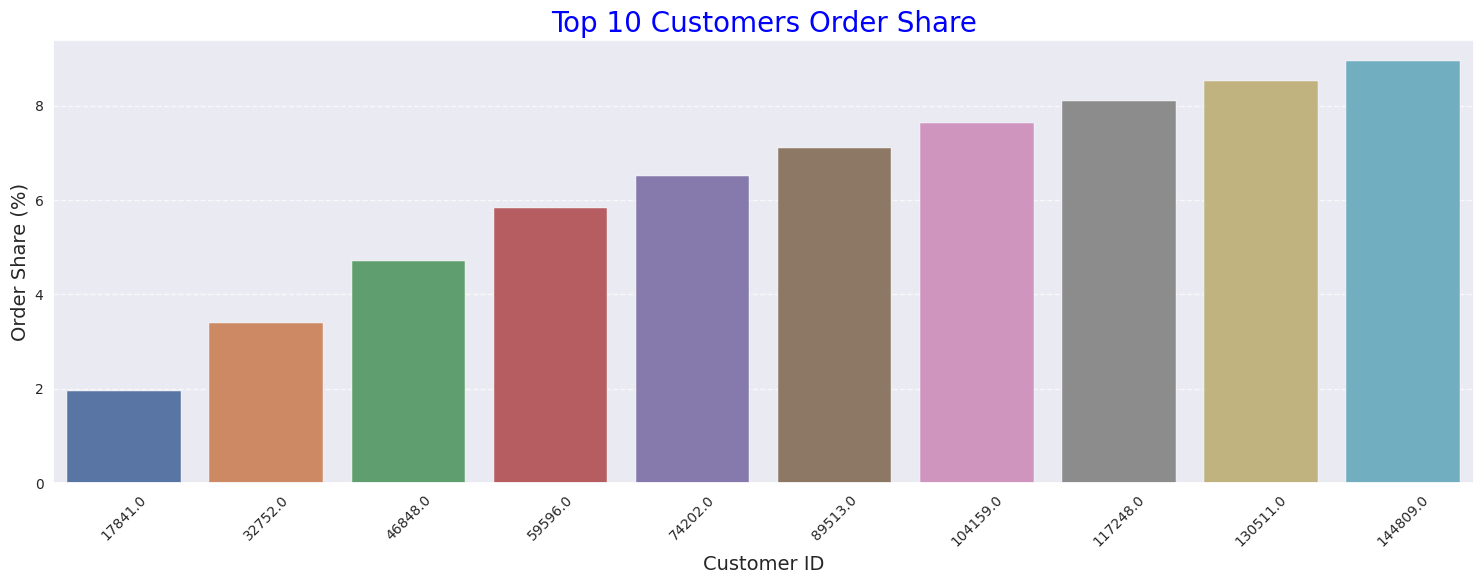

In [110]:
# Plot the top 10 customers' order share
plt.figure(figsize=(15, 6))
sns.barplot(x='CustomerID', y='Order share', data=order_share_df.head(10).cumsum(), palette='deep')
plt.title('Top 10 Customers Order Share', color='blue', fontsize=20)

# Customize the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Order Share (%)', fontsize=14)
plt.tight_layout()
plt.show()


#####  What is/are the insight(s) found from the chart?

The bar chart shows that 10 customers account for nearly 9% of the total orders, which is a large concentration given that there are 4,338 unique customers.
Small number of customers account for a large percentage of orders, which is typical of bulk buyers rather than individual shoppers.
If these high-ordering customers stop buying, it could impact overall sales significantly.
Businesses should consider identifying, retaining, and offering incentives to such high-value customers.

#### Chart - 6 Distribution of the numerical features.

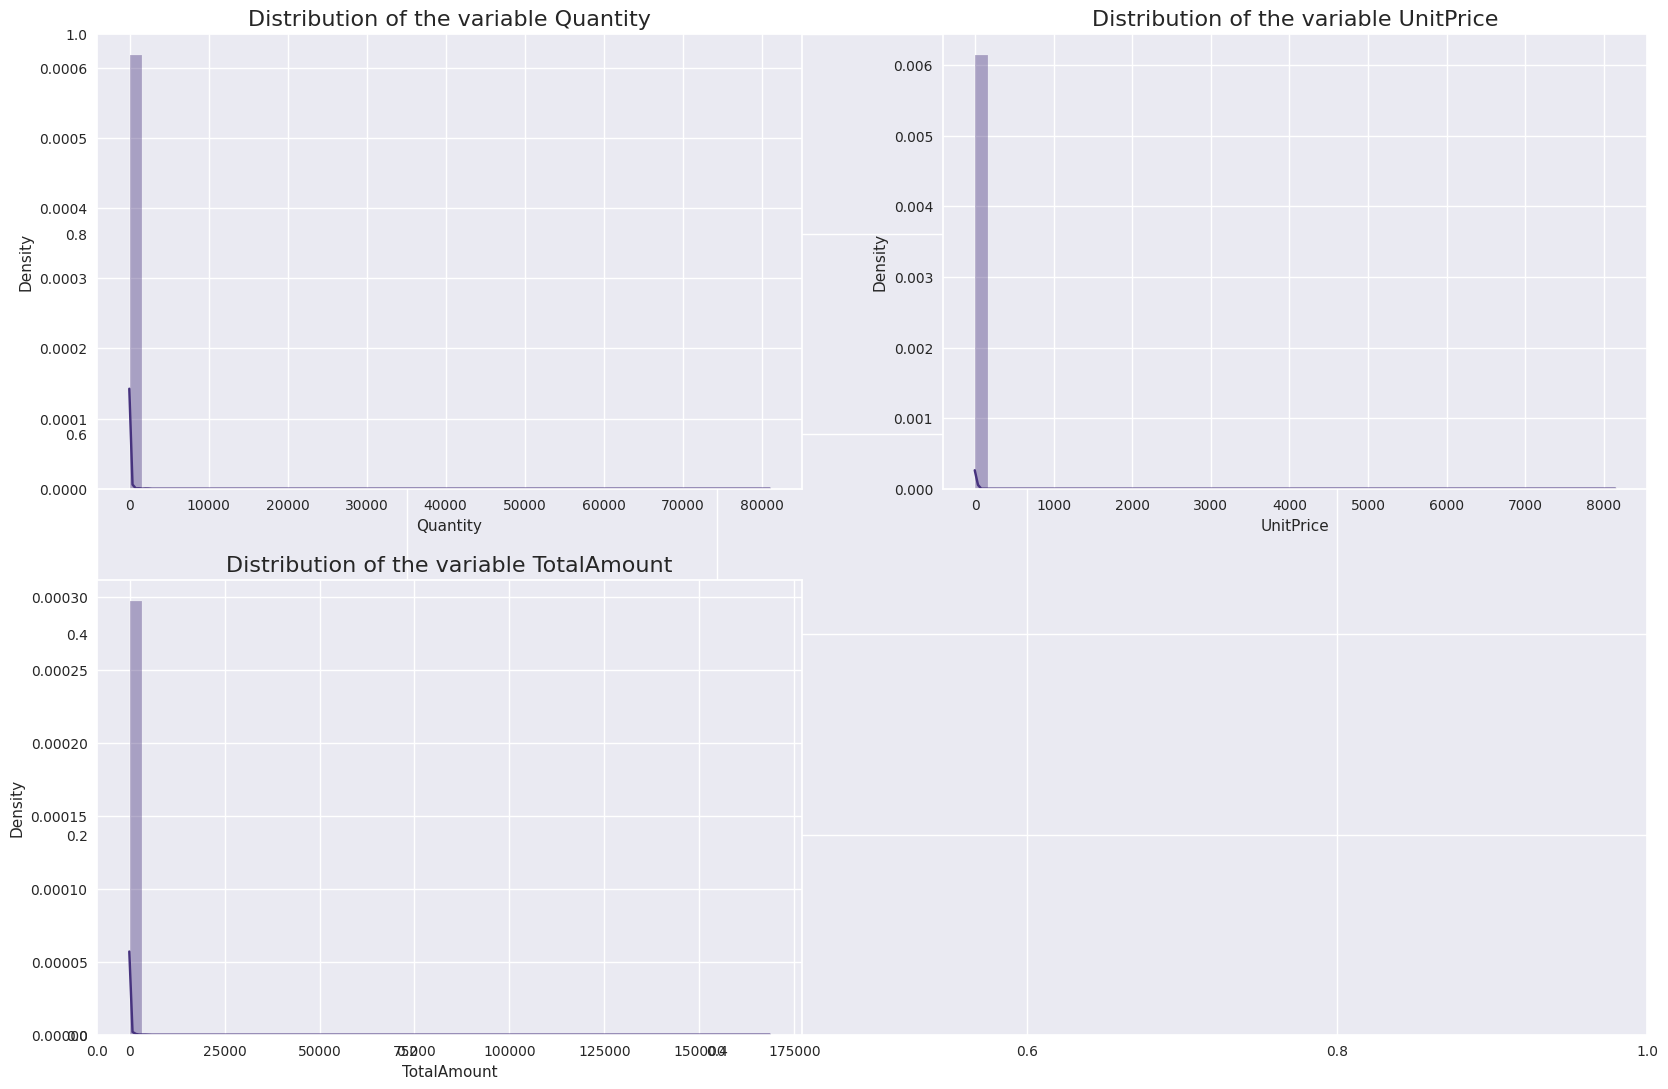

In [111]:

# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(Myntra_online_Retail[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1


##### 2. What is/are the insight(s) found from the chart?

The distribution of all the variables are heavily right skewed.the mean is generally greater than the median. This is because in a right-skewed distribution (or positively skewed distribution), there is a "tail" on the right side, where a few large values pull the mean towards the higher end of the scale.

The mean will usually lie to the right of the peak of the distribution (mode), making the order Mode < Median < Mean for a right-skewed dataset.

We will apply log transformation on these variables to make it less skewed.

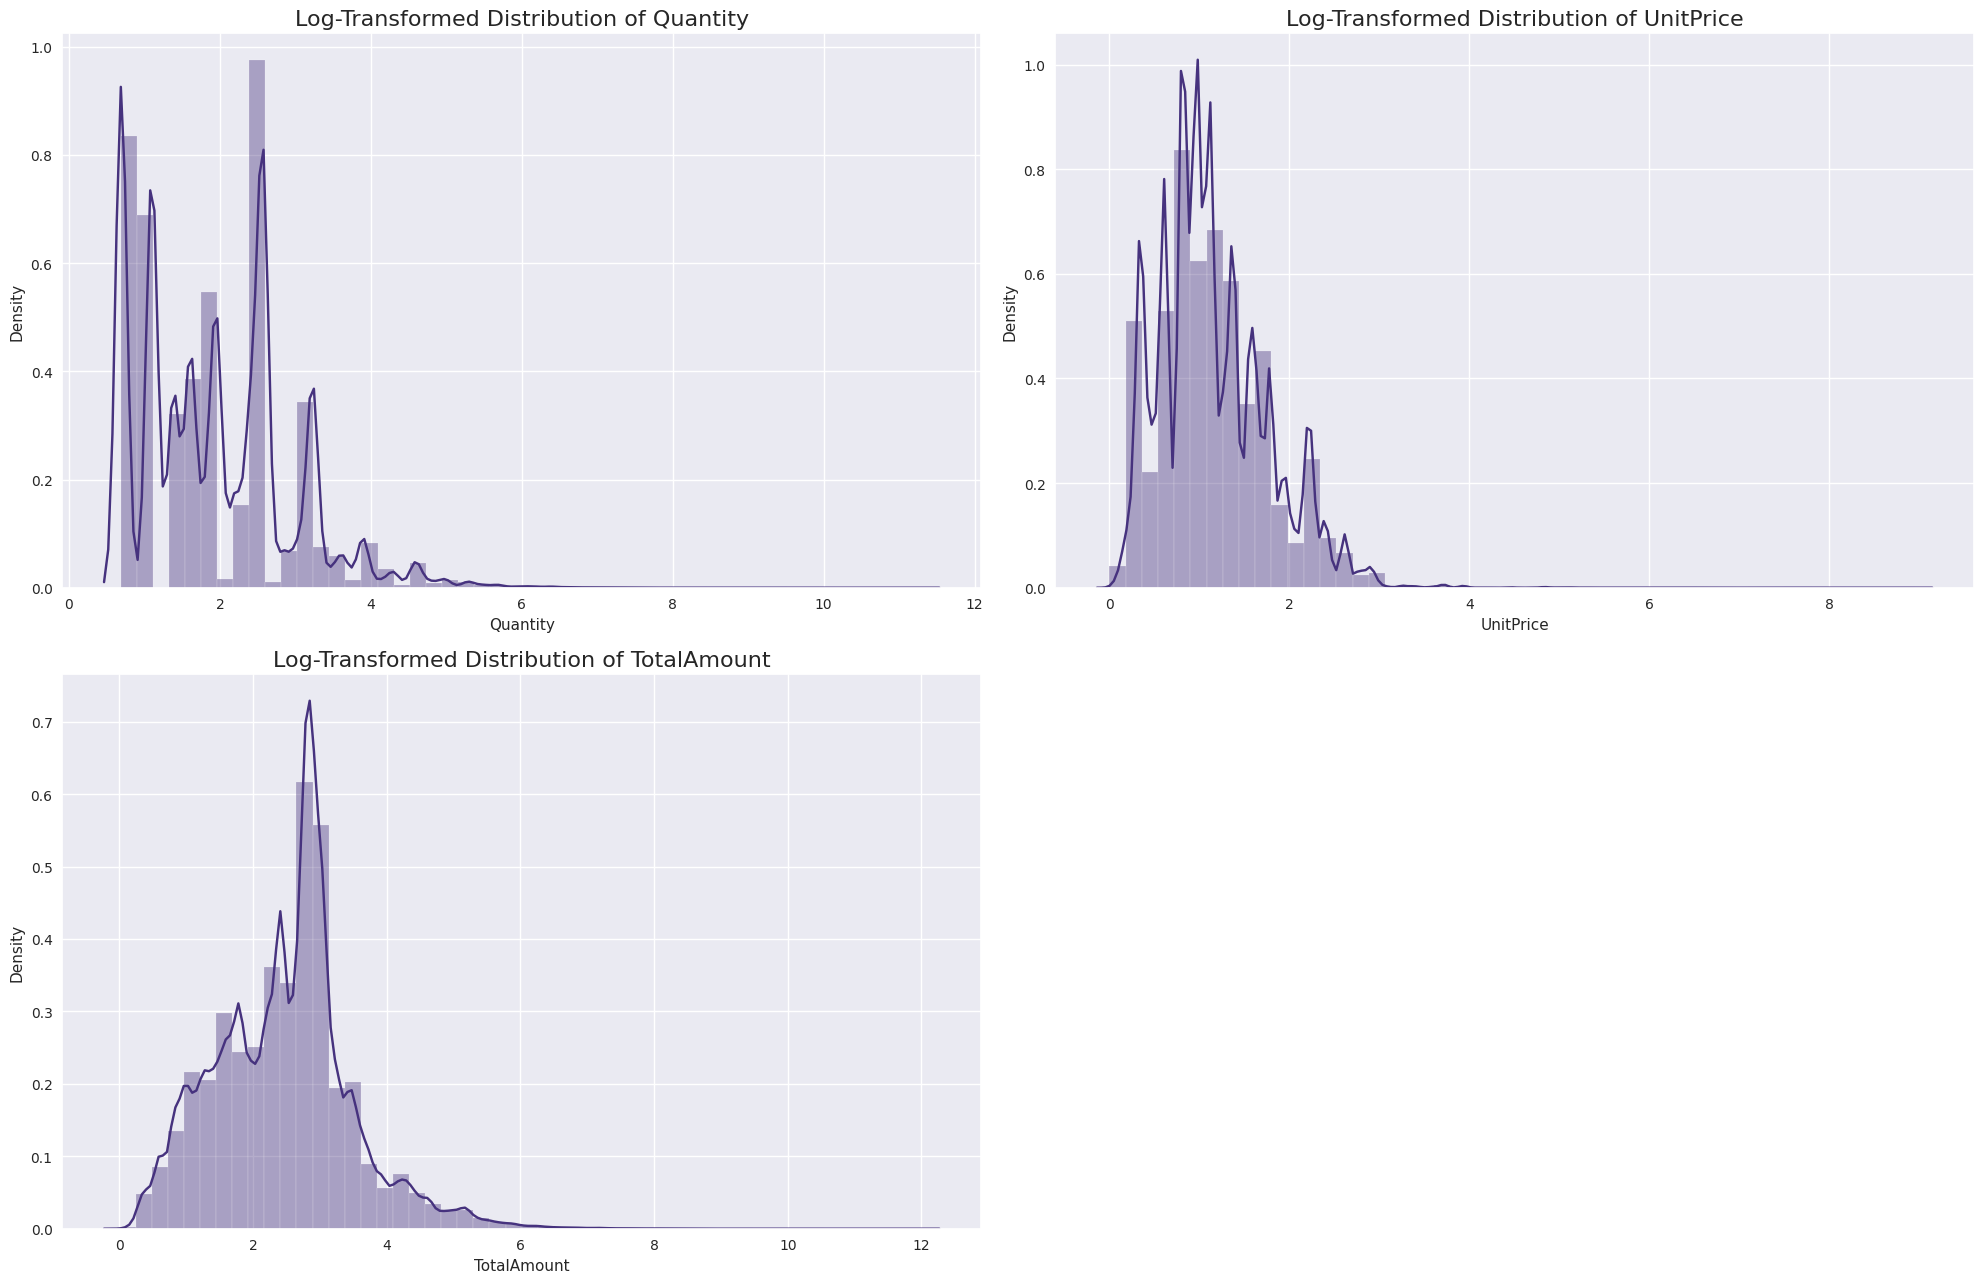

In [112]:
# Log transformation and distribution plot
plt.figure(figsize=(20, 13))

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.distplot(np.log1p(Myntra_online_Retail[feature]), kde=True)
    plt.title(f"Log-Transformed Distribution of {feature}", fontsize=16)
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


After applying a log transformation, the variables exhibit reduced skewness compared to their original state. Although the distribution does not become perfectly normal, it is noticeably closer to a normal distribution than it was before.

#### Chart - 7 number of purchases w.r.t the day of the week

In [113]:
# number of purchases w.r.t the day of the week
day_data = Myntra_online_Retail['Day'].value_counts().reset_index()
day_data .rename(columns={'Day': 'Day Name'}, inplace=True)
day_data .rename(columns={'count': 'Count'}, inplace=True)
day_data

,Day Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


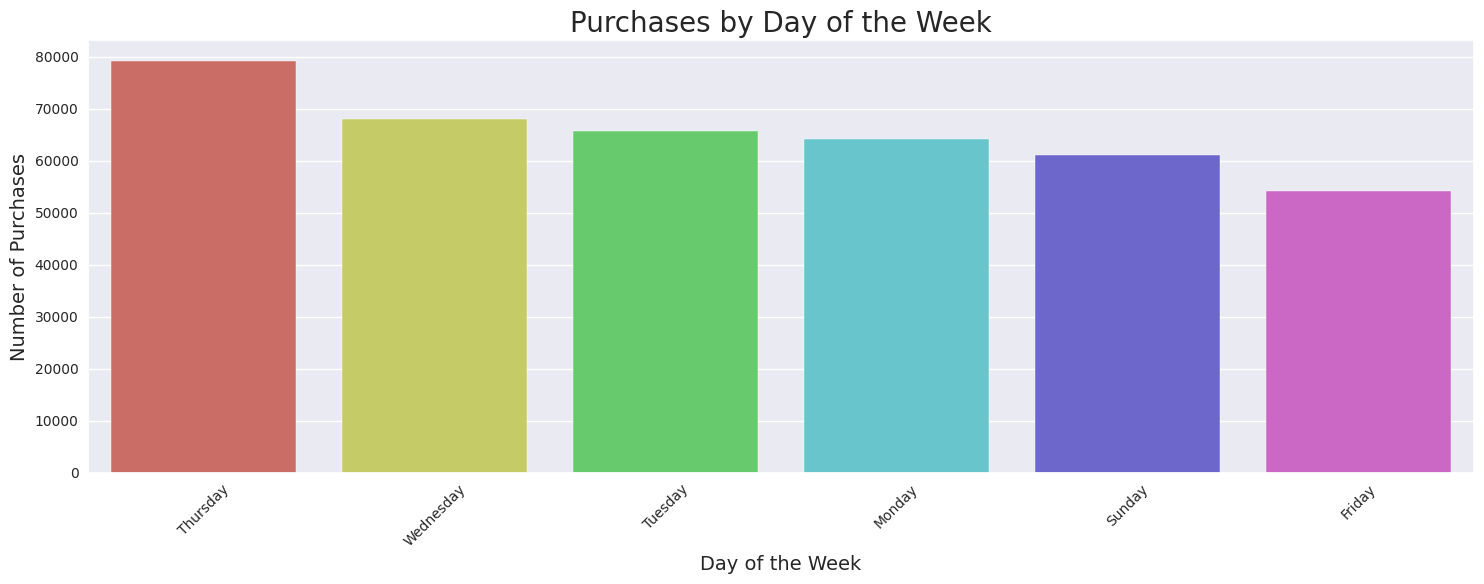

In [114]:
# Plot the number of purchases with each day bar having a unique color
plt.figure(figsize=(15, 6))

# Create a distinct color palette based on the number of unique days
unique_days = day_data['Day Name'].nunique()
palette = sns.color_palette("hls", unique_days)

sns.barplot(x='Day Name', y='Count', data=day_data , palette=palette)
plt.title('Purchases by Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The highest number of purchases were made on Thursday, followed by Wednesday, while Friday recorded the fewest transactions.

#### Chart - 8 number of purchases w.r.t month

In [115]:

# number of purchases w.r.t month
month_data =  Myntra_online_Retail['Month'].value_counts().reset_index()
month_data.rename(columns={'Month': 'Month Name'}, inplace=True)
month_data.rename(columns={'count': 'Count'}, inplace=True)
month_data

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


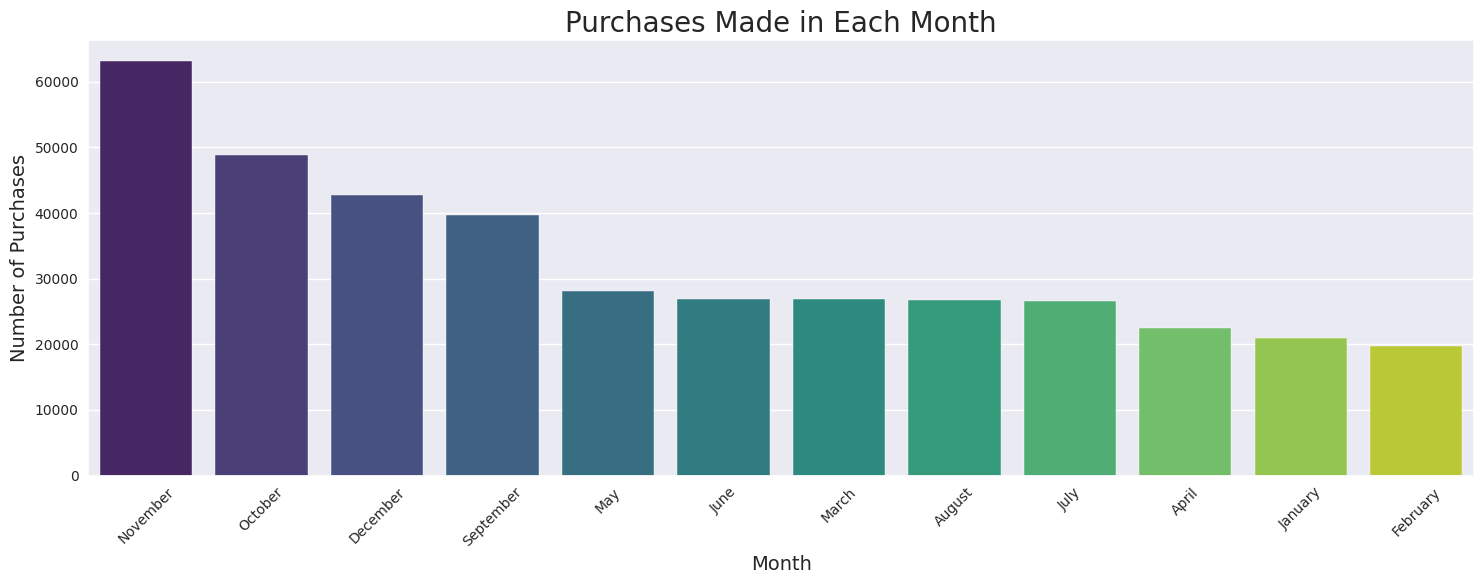

In [116]:
# Plot the number of purchases with a unique color for each month
plt.figure(figsize=(15, 6))

# Create a color palette with a distinct color for each month
unique_months = month_data['Month Name'].nunique()
palette = sns.color_palette("viridis", unique_months)

sns.barplot(x='Month Name', y='Count', data=month_data, palette=palette)
plt.title('Purchases Made in Each Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The most number of purchases are made during October to December which is a festive season for many people.

The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

#### Chart - 9  number of purchases w.r.t hour of the day

In [117]:
# number of purchases w.r.t hour of the day
hour_df = Myntra_online_Retail['Hour'].value_counts().reset_index()
hour_df.rename(columns={'Hour': 'Hour Name'}, inplace=True)
hour_df.rename(columns={'count': 'Count'}, inplace=True)
hour_df

,Hour Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


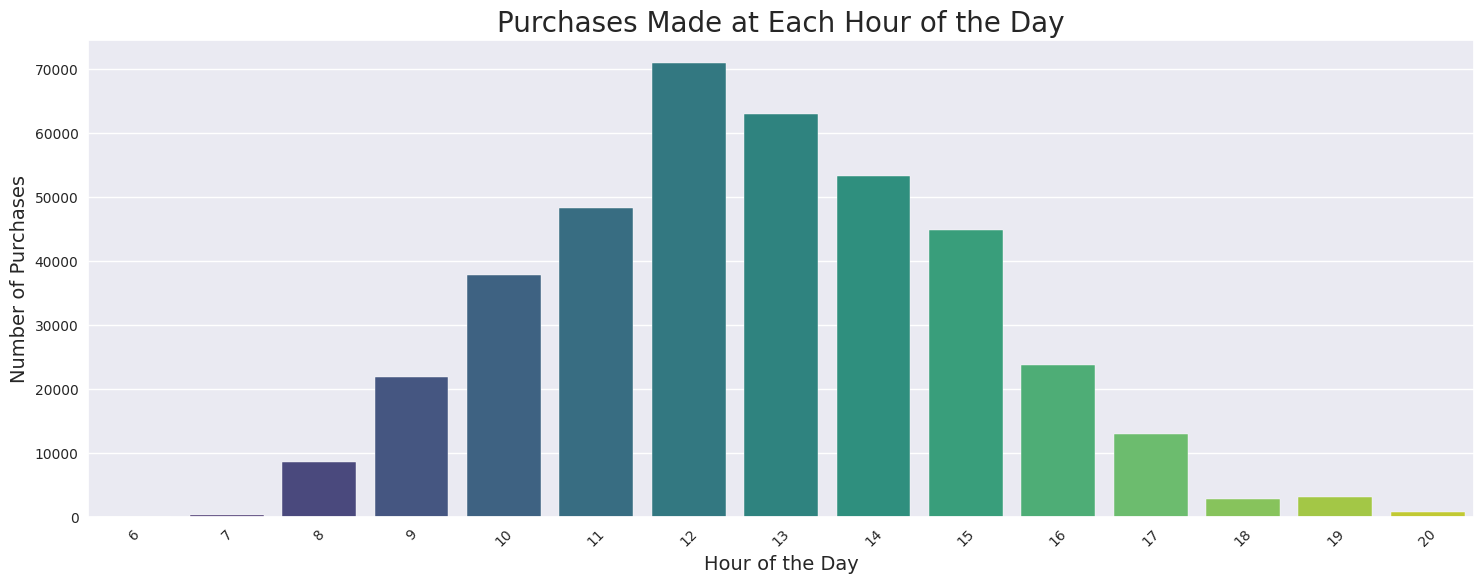

In [118]:
# Plot the number of purchases w.r.t hour of the day with distinct colors for each hour
plt.figure(figsize=(15, 6))

# Determine the number of unique hours and create a corresponding color palette
unique_hours = hour_df['Hour Name'].nunique()
palette = sns.color_palette("viridis", unique_hours)

sns.barplot(x='Hour Name', y='Count', data=hour_df, palette=palette)
plt.title('Purchases Made at Each Hour of the Day', fontsize=20)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The majority of purchases take place in the afternoon, while only a few occur in the morning or evening.

We can categorize this hour-wise data into morning, afternoon, and evening time slots.

#### Chart - 10  group the time into 3 buckets

In [119]:
# group the time into 3 buckets
def day_timeslot(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'
# apply the function into the column
Myntra_online_Retail['day_time']=Myntra_online_Retail['Hour'].apply(day_timeslot)
Myntra_online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,MonthNum,DayNum,Hour,Minute,Month,TotalAmount,day_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning


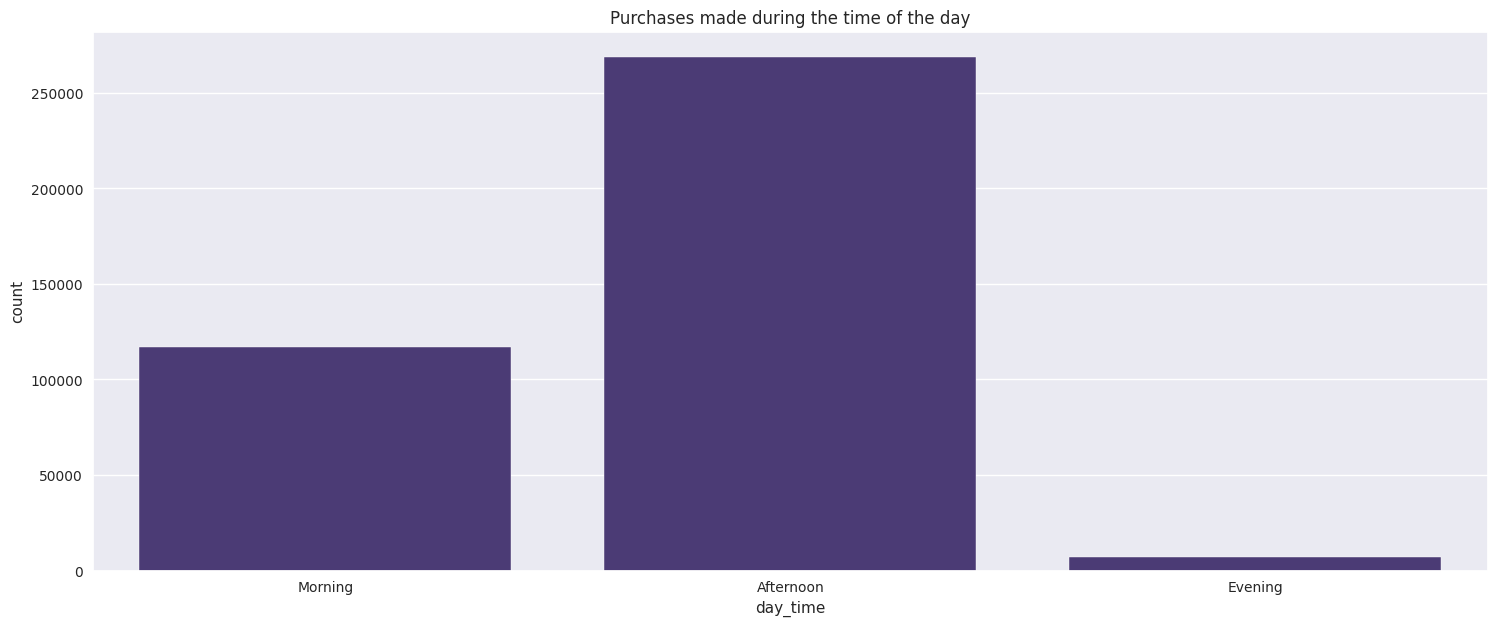

In [120]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='day_time', data=Myntra_online_Retail)
plt.title('Purchases made during the time of the day')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

It is now evident that the highest number of purchases occur in the afternoon, followed by the morning, with the evening seeing the least activity.


##**Let us create the RFM Model (Recency, Frequency and Monetary):**

Recency, Frequency, and Monetary Value (RFM) is a marketing analysis framework used to evaluate customer behavior and identify an organization's most valuable customers based on their purchasing patterns. This model assesses customers using three key metrics:

1. **Recency**: The time elapsed since a customer’s last purchase.
2. **Frequency**: The number of times a customer makes a purchase within a given period.
3. **Monetary Value**: The total amount spent by a customer on purchases.
RFM analysis assigns a numerical score to each customer in these categories, typically on a scale of 1 to 5, where higher values indicate stronger engagement and spending habits. Customers who score highly across all three factors are considered the most valuable, as they are more likely to continue doing business with the company.

## **Importance of RFM Analysis**

By leveraging RFM analysis, businesses can segment their customers based on spending behaviors and determine how much revenue is driven by repeat buyers versus new customers. It helps organizations optimize their marketing efforts by identifying high-value customers who can be nurtured with personalized strategies.

However, while RFM analysis provides valuable insights, businesses should be mindful of striking a balance in their engagement strategies. Over-marketing to top customers can lead to fatigue, while lower-ranked customers may benefit from targeted efforts to improve retention. Instead of relying solely on past behaviors, companies should use RFM analysis as a dynamic tool to refine their customer relationship strategies and drive sustainable growth.

# **Steps for RFM Segmentation**
**Calculate RFM Values** – Find Recency (last purchase date), Frequency (number of purchases), and Monetary Value (total spending) for each customer.

**Group Customers** – Divide customers into different categories based on their RFM scores using Excel, Python, or other tools.

**Target Key Groups** – Identify which customer segments need loyalty rewards and which need re-engagement campaigns.

**Personalize Marketing** – Send customized offers and messages based on customer behavior to improve sales and retention.

Since the retail store is based in the UK and the majority of customers are from the UK, we have decided to focus only on UK-based customers for segmentation.

In [121]:

# filter UK data only
Myntra_online_Retail=Myntra_online_Retail[Myntra_online_Retail['Country']=='United Kingdom']
# print the shape of the data
Myntra_online_Retail.shape

(349203, 17)

**Calculating RFM Scores:**

In [122]:

# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date=Myntra_online_Retail['InvoiceDate'].max()
latest_date

Timestamp('2011-12-09 12:49:00')

In [123]:
# Define the latest transaction date
latest_date = dt.datetime(2011, 12, 10)

# Compute RFM metrics for each customer
RFM_df = Myntra_online_Retail.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (latest_date - x.max()).days),
    Frequency=('InvoiceNo', 'count'),
    Monetary=('TotalAmount', 'sum')
)

# Convert Recency to integer
RFM_df['Recency'] = RFM_df['Recency'].astype(int)

# Reset index and display
RFM_df.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [124]:
# descriptive stats of the rfm dataframe
RFM_df.describe()


,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


#### Chart - 11 Distplot **Let us plot the distribution of Recency, Frequency and Monetary Value:**

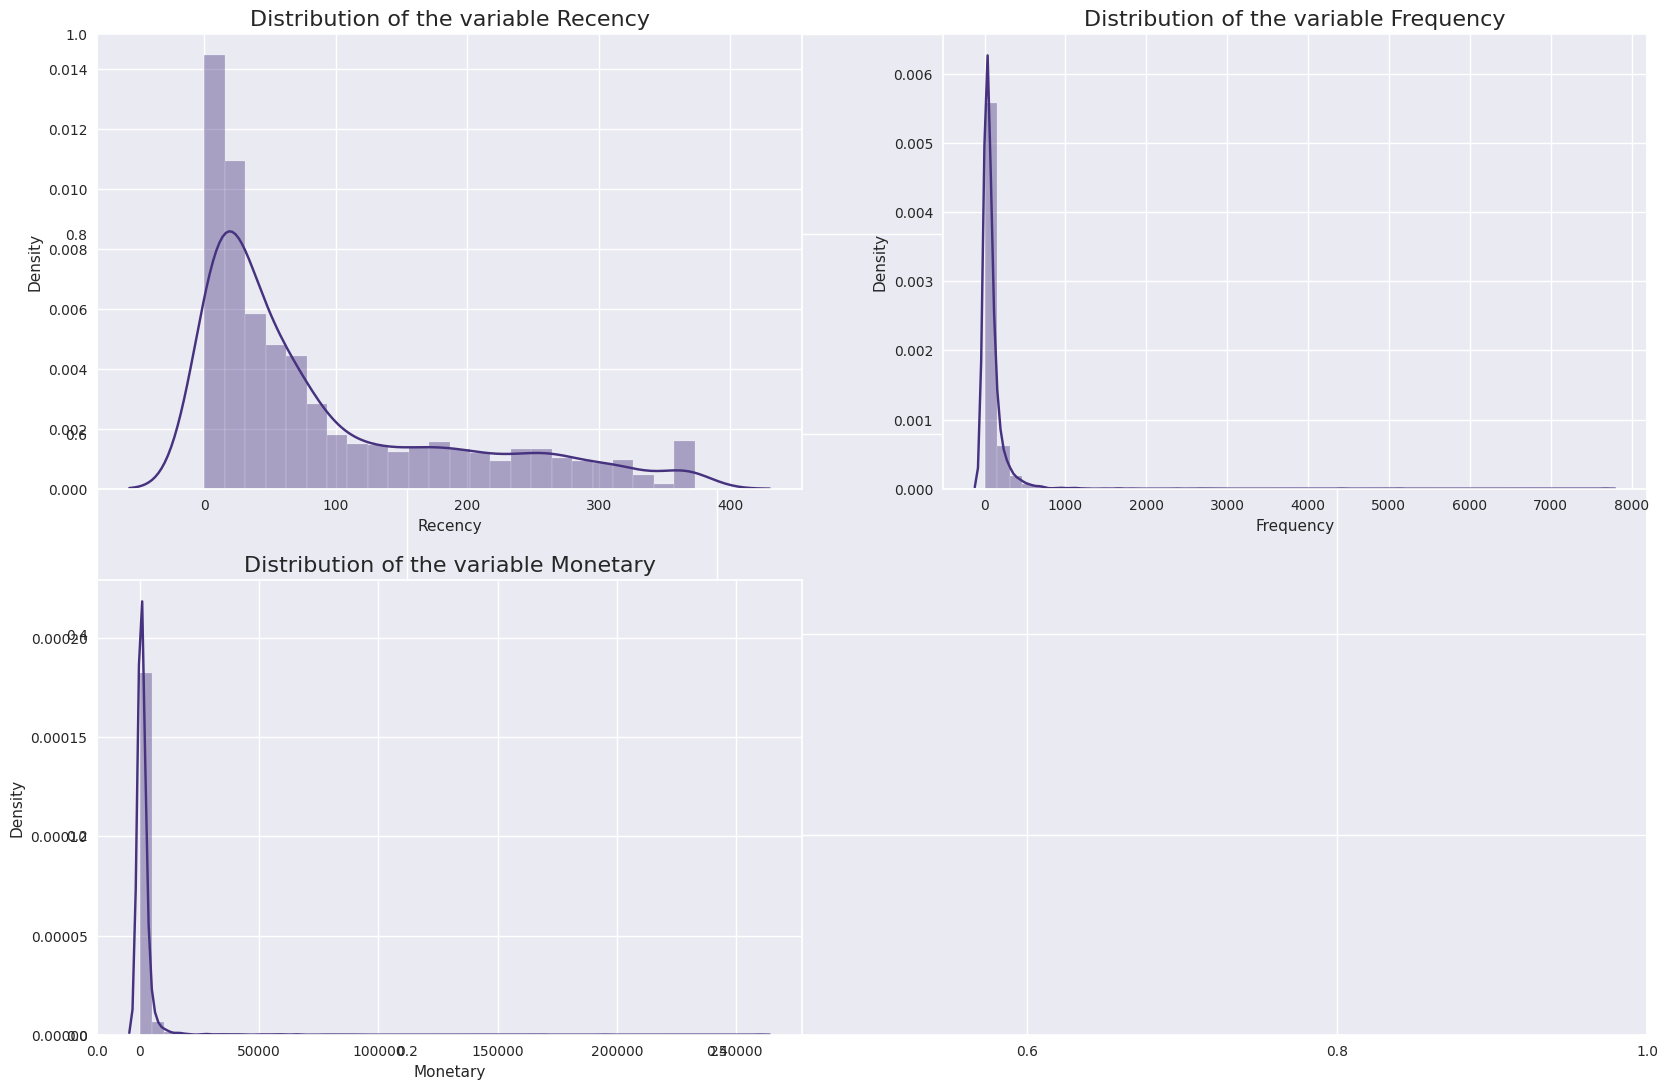

In [125]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in RFM_df:
  plt.subplot(2,2,count)
  sns.distplot(RFM_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

**Apply log transformation to the RFM values and plot each distribution:**

Applying a log transformation in RFM (Recency, Frequency, Monetary) analysis or any data analysis task helps in several ways:

**Normalization**: RFM metrics vary widely in scale. For instance, monetary values can range from small to very large amounts, while purchase frequency might be between a few and hundreds. Log transformation helps bring these values to a comparable scale.

**Reducing Skewness**: Many datasets, especially those involving monetary transactions or purchase counts, tend to be right-skewed, with most values clustered at the lower end and a long tail of higher values. Log transformation makes the distribution more symmetrical, making it easier to analyze.

**Minimizing Outlier Impact**: Some customers may have extremely high purchase values or unusually frequent transactions, which can distort the analysis. Log transformation reduces the effect of these outliers by compressing large values, leading to a more balanced dataset.

In [126]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
RFM_df['Recency'] = [handle_negative(x) for x in RFM_df['Recency']]
RFM_df['Monetary'] = [handle_negative(x) for x in RFM_df['Monetary']]

# apply log transfomation to RFM values
log_df = RFM_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

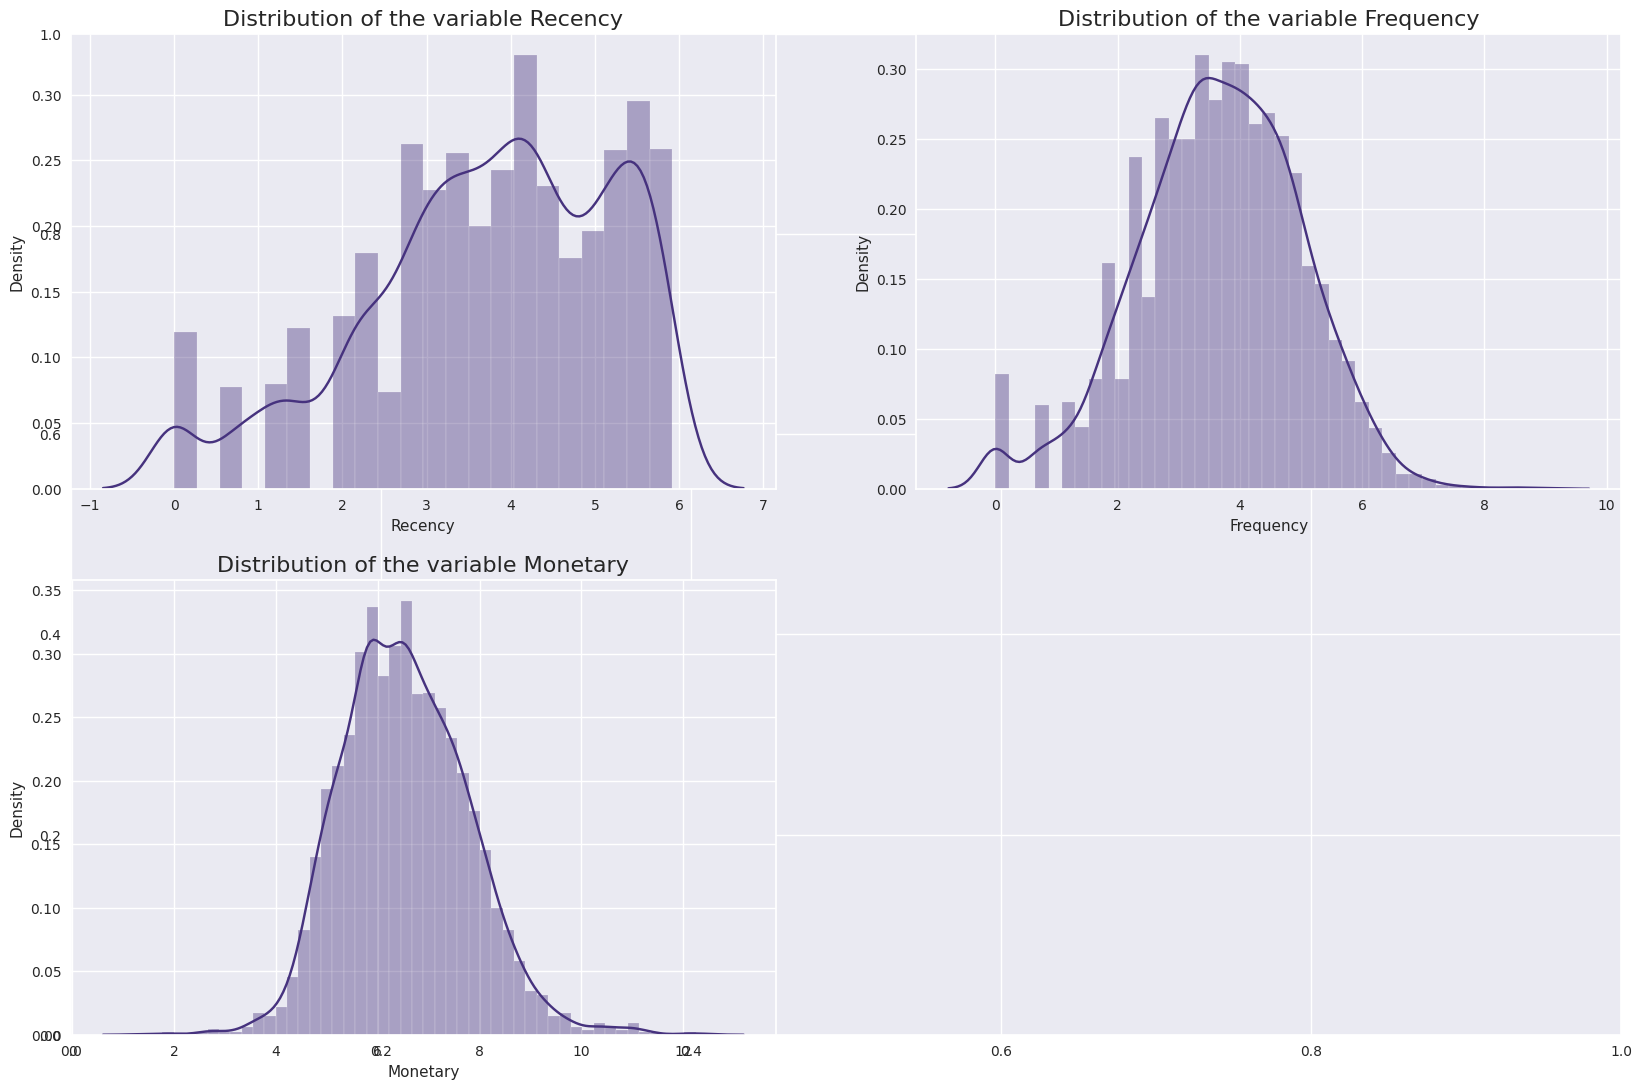

In [127]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1


The Recency, Frequency, and Monetary value distributions now appear approximately normal.









In [128]:
# apply log transformation on the original rfm dataframe
RFM_df['Recency_log'] = RFM_df['Recency'].apply(np.log)
RFM_df['Frequency_log'] = RFM_df['Frequency'].apply(np.log)
RFM_df['Monetary_log'] = RFM_df['Monetary'].apply(np.log)

In [129]:
# display the rfm_df
RFM_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366


In [130]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = RFM_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

###Next step is to convert unlabelled data into clusters.K-means clustering groups unlabelled data into distinct clusters by assigning each data point to the nearest centroid, forming well-defined groups.

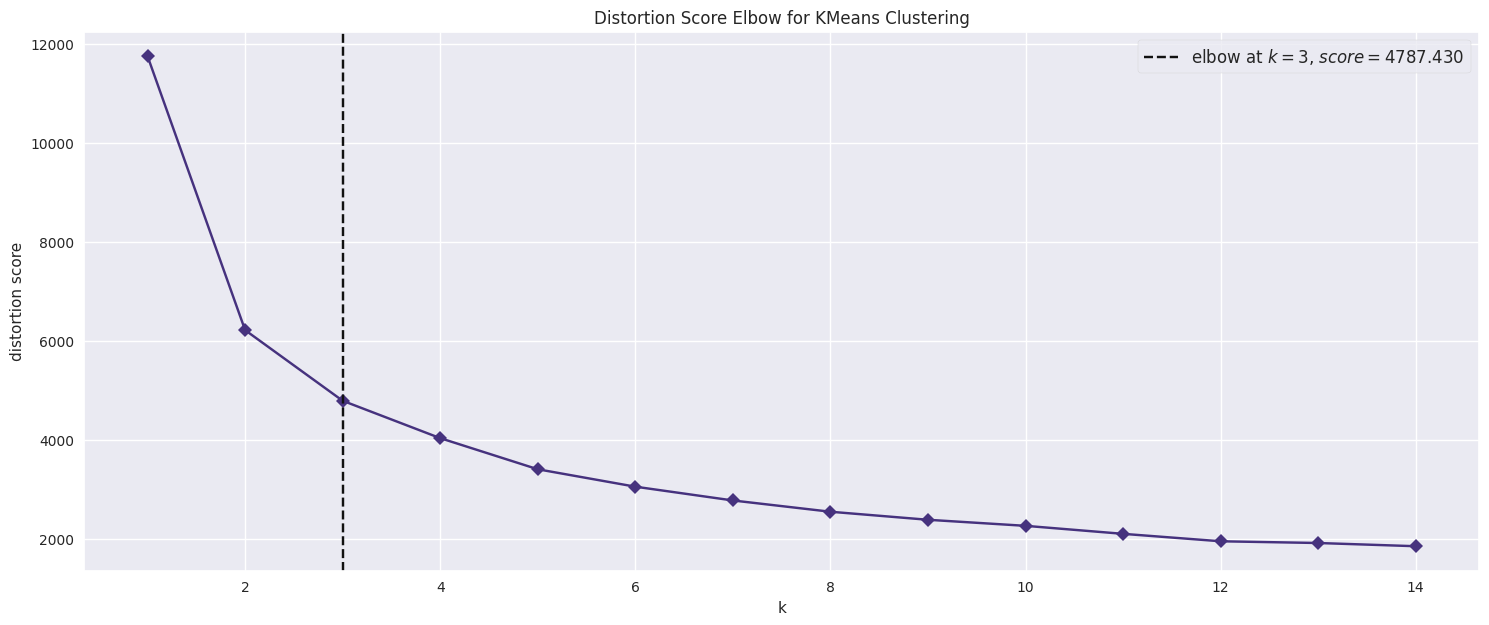

In [131]:
# Using the elbow method to determine the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Dictionary to store Sum of Squared Errors (SSE)
sse_values = {}
for k in range(1, 15):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    model.fit(X)
    sse_values[k] = model.inertia_

# Visualizing the elbow method using Yellowbrick
elbow_viz = KElbowVisualizer(model, k=(1, 15), metric='distortion', timings=False)
elbow_viz.fit(X)
elbow_viz.show()
plt.show()


Based on the elbow method, we determine that the ideal number of clusters for Recency, Frequency, and Monetary values is 3.

We will now rerun the model using 3 clusters.

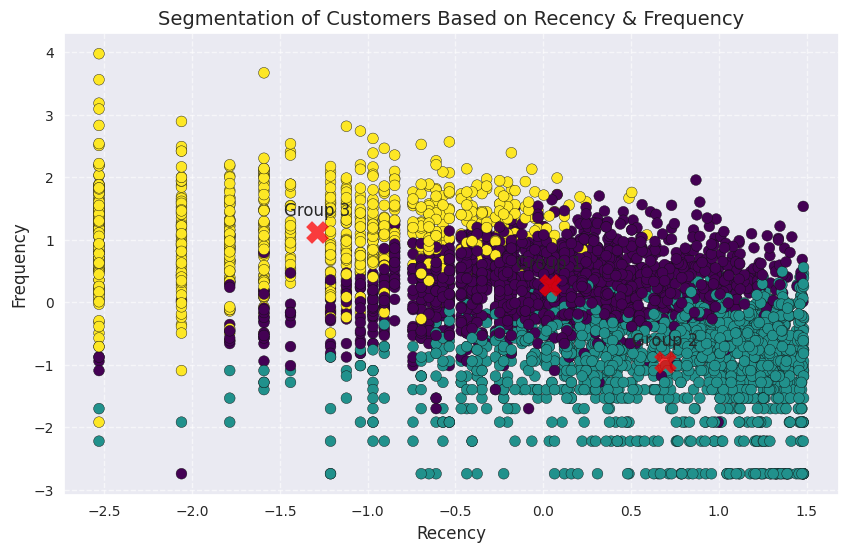

In [132]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X contains the features (e.g., Recency and Frequency)
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_model.fit(X)
cluster_labels = kmeans_model.predict(X)

# Scatter plot of clustered data
plt.figure(figsize=(10, 6))
plt.title('Segmentation of Customers Based on Recency & Frequency', fontsize=14)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=60, cmap='viridis', edgecolors='k')

# Marking cluster centers
cluster_centers = kmeans_model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=250, alpha=0.75, marker='X')

# Annotate cluster centers
for idx, center in enumerate(cluster_centers):
    plt.annotate(f'Group {idx+1}', (center[0], center[1]), textcoords="offset points", xytext=(0, 12), ha='center', fontsize=12)

plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

**Interpreting the Clusters with the help of RFM Group:**

**Now, split the RFM values into four quantiles:**

In [134]:
# Compute quartiles
quantiles = RFM_df.quantile([0.25, 0.5, 0.75]).to_dict()

# Function to assign RFM scores
def assign_score(value, metric, reverse=False):
    if reverse:  # For Recency (lower is better)
        return 1 if value <= quantiles[metric][0.25] else 2 if value <= quantiles[metric][0.5] else 3 if value <= quantiles[metric][0.75] else 4
    else:  # For Frequency & Monetary (higher is better)
        return 4 if value <= quantiles[metric][0.25] else 3 if value <= quantiles[metric][0.5] else 2 if value <= quantiles[metric][0.75] else 1

# Assign RFM scores
RFM_df['R'] = RFM_df['Recency'].apply(assign_score, args=('Recency', True))   # Lower Recency = better (reverse=True)
RFM_df['F'] = RFM_df['Frequency'].apply(assign_score, args=('Frequency', False))  # Higher Frequency = better
RFM_df['M'] = RFM_df['Monetary'].apply(assign_score, args=('Monetary', False))  # Higher Monetary = better

# Reset index
RFM_df.reset_index(drop=True, inplace=True)

# Display first few rows
RFM_df.head()


,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
4,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


**Calculate RFM Group and RFM Score from the RFM segmentation:**

In [135]:
# Create RFM group column by concatenating R, F, and M scores as strings
RFM_df['RFMGroup'] = RFM_df[['R', 'F', 'M']].astype(str).agg(''.join, axis=1)

# Compute RFM score by summing R, F, and M values
RFM_df['RFMScore'] = RFM_df[['R', 'F', 'M']].sum(axis=1)

# Reset index and display the first few rows
RFM_df.reset_index(drop=True, inplace=True)
RFM_df.head()


,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3
4,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [136]:
# Assign cluster labels to the dataset
RFM_df = RFM_df.assign(Cluster=kmeans_model.labels_)

# Display the first few rows
RFM_df.head()


,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,0
1,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,2
2,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,2
3,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3,2
4,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,2


In [138]:

# Group by cluster label and calculate mean
# Filter only numeric columns for calculating the mean
numeric_df = RFM_df.select_dtypes(include=['float64', 'int64'])

# Add 'Cluster' column back to the numeric DataFrame (assuming it's still in RFM_df)
numeric_df['Cluster'] = RFM_df['Cluster']

# Group by cluster label and calculate mean for only numeric columns
cluster_averages = numeric_df.groupby('Cluster').mean().reset_index()

# Display the result
cluster_averages

,Cluster,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
0,0,67.853600,69.166969,1199.700365,3.787118,4.012225,6.770923,2.425287,2.156685,2.198427,6.780399
1,1,165.282744,15.119196,286.190805,4.759947,2.386550,5.410671,3.298683,3.629245,3.564103,10.492030
2,2,10.912621,258.559466,5933.187633,1.830261,5.151263,8.043445,1.207524,1.288835,1.241505,3.737864


# **Conclusion**

###**Cluster 1**: "At-Risk / Lapsed Customers"

**Recency**: High (Avg. 165 days since last purchase)

**Frequency**: Low (Avg. 15 transactions)

**Monetary**: Low (Avg. $286 total spend)

 **Insight**: These customers haven’t purchased in a long time, bought infrequently, and spent less overall. They may have disengaged from the brand.

 Strategy:

**1. Win-back campaigns**  – Offer discounts or exclusive deals to encourage return purchases.

**2. Feedback collection** – Understand why they stopped purchasing and tailor responses accordingly.

**3. Re-engagement emails** – Personalized recommendations based on past shopping behavior.


###**Cluster 0**: "Potential Loyalists / Promising Customers"

**Recency**: Moderate (Avg. 68 days)

**Frequency**: Moderate (Avg. 69 transactions)

**Monetary**: Moderate (Avg. $1200 total spend)

 **Insight**: These customers show promising behavior, making purchases at a decent frequency and spending a moderate amount. With proper engagement, they can be converted into loyal customers.

 Strategy:

**1. Personalized product recommendations** – Based on their past purchases.

**2. Loyalty incentives** – Offer points or discounts for more frequent purchases.

**3. Targeted campaigns** – Remind them of products left in their cart or introduce special offers to encourage higher spending.

###**Cluster 2** "Champions / Loyal Customers"

**Recency**: Very low (Avg. 11 days since last purchase)

**Frequency**: Very high (Avg. 259 transactions)

**Monetary**: Very high (Avg. $5933 total spend)

 **Insight**: These are the most engaged and high-spending customers. They shop often, spend a lot, and are your brand’s strongest advocates.

 Strategy:

**1. Exclusive rewards** – VIP programs, early access to new products, and premium support.

**2. Referral incentives** – Encourage them to bring in new customers through referral bonuses.

**3. Upsell & cross-sell** – Recommend premium or complementary products based on past purchases.



K-Means clustering (K=3) effectively segments customers into meaningful groups based on their purchase behavior.
Each segment requires a tailored marketing strategy to maximize retention and revenue.
Using RFM analysis with clustering helps businesses focus on customer engagement and optimize their marketing efforts.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***